In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('/content/patan_final.xlsx')
data

,Date,Arrival,Price
0,2010-01-01,84.800,2755.0
1,2010-01-02,75.800,2750.0
2,2010-01-03,80.300,2752.5
3,2010-01-04,87.400,2750.0
4,2010-01-05,122.100,2770.0
...,...,...,...
5433,2024-11-16,238.050,6475.0
5434,2024-11-17,234.558,6441.0
5435,2024-11-18,217.580,6450.0
5436,2024-11-19,306.980,6450.0


In [5]:
filepath = '/content/patan_final.xlsx'
# Assuming the date column is named 'Date' instead of 'date'
macro_data = pd.read_excel(filepath, parse_dates=['Date'], index_col='Date')
# If the date column has a different name, replace 'Date' with the actual column name
print(macro_data.shape)
macro_data.head()

(5438, 2)


,Arrival,Price
Date,,
2010-01-01,84.8,2755.0
2010-01-02,75.8,2750.0
2010-01-03,80.3,2752.5
2010-01-04,87.4,2750.0
2010-01-05,122.1,2770.0


In [6]:
ad_fuller_result_1 = adfuller(macro_data['Arrival'].diff()[1:])

print('Arrivals')  # Changed from 'realgdp'
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['Price'].diff()[1:])

print('Price')  # Changed from 'realcons'
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Arrivals
ADF Statistic: -16.65805553847737
p-value: 1.5829176083531186e-29

---------------------

Price
ADF Statistic: -11.781348606851434
p-value: 1.0330943009576943e-21


In [7]:
!pip install statsmodels
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming your data has 'Arrivals' and 'Price' columns, replace them if necessary
print('Price causes Arrivals?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['Arrival', 'Price']], 4)  # Changed column names

print('\nArrivals causes Price?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['Price', 'Arrival']], 4)  # Changed column names

Price causes Arrivals?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3112  , p=0.5770  , df_denom=5434, df_num=1
ssr based chi2 test:   chi2=0.3114  , p=0.5769  , df=1
likelihood ratio test: chi2=0.3113  , p=0.5769  , df=1
parameter F test:         F=0.3112  , p=0.5770  , df_denom=5434, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.8509  , p=0.0001  , df_denom=5431, df_num=2
ssr based chi2 test:   chi2=17.7182 , p=0.0001  , df=2
likelihood ratio test: chi2=17.6893 , p=0.0001  , df=2
parameter F test:         F=8.8509  , p=0.0001  , df_denom=5431, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.5381  , p=0.0000  , df_denom=5428, df_num=3
ssr based chi2 test:   chi2=28.6513 , p=0.0000  , df=3
likelihood ratio test: chi2=28.5760 , p=0.0000  , df=3
parameter F test:         F=9.5381  , p=0.0000  , df_denom=5428, df_num=3

Granger Causality
number of lags (no zero) 4

In [8]:
macro_data = macro_data[['Price', 'Arrival']]
print(macro_data.shape)

(5438, 2)


In [9]:
train_df=macro_data[:-1000]
test_df=macro_data[-1000:]

In [10]:
print(test_df.shape)

(1000, 2)


In [11]:
model = VAR(train_df.diff()[1:])

In [12]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.54       19.54   3.048e+08       19.54
1        19.03       19.03   1.832e+08       19.03
2        18.94       18.95   1.680e+08       18.94
3        18.92       18.94   1.640e+08       18.92
4        18.90       18.92   1.613e+08       18.91
5        18.89       18.93   1.606e+08       18.91
6        18.89       18.93   1.596e+08       18.90
7        18.88       18.92   1.581e+08       18.89
8        18.88       18.93   1.580e+08       18.90
9        18.88       18.93   1.579e+08       18.90
10       18.87       18.93   1.568e+08       18.89
11       18.85       18.92   1.543e+08       18.88
12       18.85       18.92   1.534e+08       18.87
13       18.84      18.92*   1.525e+08      18.87*
14       18.84       18.93   1.524e+08       18.87
15       18.84       18.93   1.524e+08       18.87
16       18.84       18.94   1.

In [13]:
# The disp argument is no longer supported in newer versions of statsmodels.
# Remove it to fix the error.
fitted_model = model.fit()
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Nov, 2024
Time:                     16:46:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    19.0268
Nobs:                     4436.00    HQIC:                   19.0212
Log likelihood:          -54765.0    FPE:                1.81749e+08
AIC:                      19.0181    Det(Omega_mle):     1.81503e+08
--------------------------------------------------------------------
Results for equation Price
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              1.193281         1.369504            0.871           0.384
L1.Price          -0.344385         0.014110          -24.408           0.000
L1.Arrival        -0.021605         0.007665           -2.819           


Adjusted Forecasted Values for the next 1000 days:
                 Price     Arrival
2024-11-21    0.000000  503.199294
2024-11-22  776.477010    0.000000
2024-11-23    0.000000  350.436687
2024-11-24   81.622800    0.000000
2024-11-25    0.000000  132.179565
...                ...         ...
2027-08-13    0.887206    0.024761
2027-08-14    0.887206    0.024761
2027-08-15    0.887206    0.024761
2027-08-16    0.887206    0.024761
2027-08-17    0.887206    0.024761

[1000 rows x 2 columns]


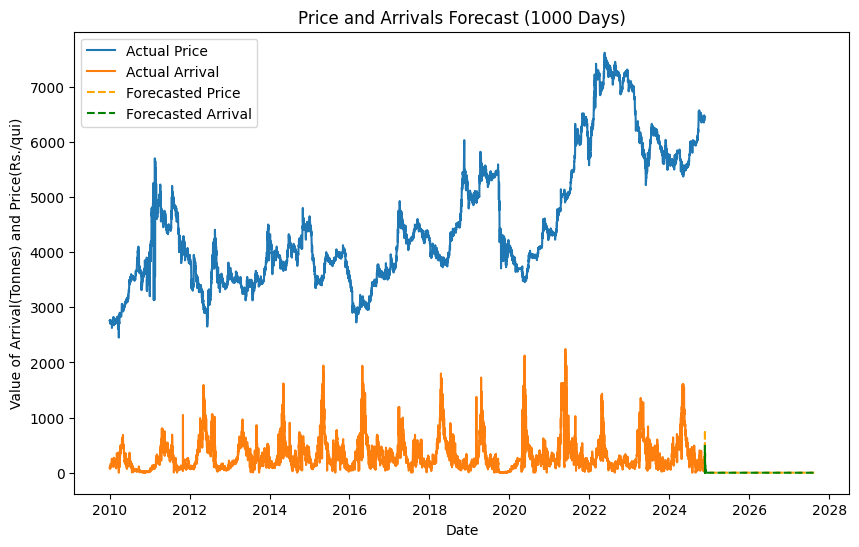

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# Assuming the previous code where the model was fitted and forecast was generated

# Forecast the next 1000 days
n_forecast = 1000
forecast_values = fitted_model.forecast(train_df.values[-fitted_model.k_ar:], steps=n_forecast)

# Convert the forecasted values into a DataFrame
forecast_index = pd.date_range(start=test_df.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')
forecast_df = pd.DataFrame(forecast_values, columns=['Price', 'Arrival'], index=forecast_index)

# Adjust for non-negative values: set negative values to zero
forecast_df['Price'] = forecast_df['Price'].clip(lower=0)
forecast_df['Arrival'] = forecast_df['Arrival'].clip(lower=0)

# Display the forecasted values
print("\nAdjusted Forecasted Values for the next 1000 days:")
print(forecast_df)

# Visualize the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(macro_data['Price'], label='Actual Price')
plt.plot(macro_data['Arrival'], label='Actual Arrival')
plt.plot(forecast_df['Price'], label='Forecasted Price', linestyle='--', color='orange')
plt.plot(forecast_df['Arrival'], label='Forecasted Arrival', linestyle='--', color='green')
plt.legend()
plt.title('Price and Arrivals Forecast (1000 Days)')
plt.xlabel('Date')
plt.ylabel('Value of Arrival(Tonnes) and Price(Rs./qui)')
plt.show()

# Optionally, save the adjusted forecasted DataFrame to a CSV
forecast_df.to_csv('/content/forecasted_values_adjusted.csv')


In [15]:
print("\nForecasted Values for the next 7 days:")
print(forecast_df)


Forecasted Values for the next 7 days:
                 Price     Arrival
2024-11-21    0.000000  503.199294
2024-11-22  776.477010    0.000000
2024-11-23    0.000000  350.436687
2024-11-24   81.622800    0.000000
2024-11-25    0.000000  132.179565
...                ...         ...
2027-08-13    0.887206    0.024761
2027-08-14    0.887206    0.024761
2027-08-15    0.887206    0.024761
2027-08-16    0.887206    0.024761
2027-08-17    0.887206    0.024761

[1000 rows x 2 columns]


In [16]:
forecast_df.columns=['Price_predicted','Arrivals_predicted']
forecast_df

,Price_predicted,Arrivals_predicted
2024-11-21,0.000000,503.199294
2024-11-22,776.477010,0.000000
2024-11-23,0.000000,350.436687
2024-11-24,81.622800,0.000000
2024-11-25,0.000000,132.179565
...,...,...
2027-08-13,0.887206,0.024761
2027-08-14,0.887206,0.024761
2027-08-15,0.887206,0.024761
2027-08-16,0.887206,0.024761


In [17]:
test_vs_pred=pd.concat([test_df,forecast_df],axis=1)

In [18]:
test_vs_pred = test_vs_pred.reset_index()

In [19]:
test_vs_pred_1 = test_vs_pred[:1000][['index','Arrival','Price']].copy()


In [20]:
test_vs_pred_2 = test_vs_pred[1000:][['Arrivals_predicted','Price_predicted']].copy()
test_vs_pred_2.index = range(len(test_vs_pred_2)) # Reset the index to start from 0
test_vs_pred_2

,Arrivals_predicted,Price_predicted
0,503.199294,0.000000
1,0.000000,776.477010
2,350.436687,0.000000
3,0.000000,81.622800
4,132.179565,0.000000
...,...,...
995,0.024761,0.887206
996,0.024761,0.887206
997,0.024761,0.887206
998,0.024761,0.887206


In [21]:
test_vs_pred_combined = pd.concat([test_vs_pred_1, test_vs_pred_2], axis=1)
test_vs_pred_combined

,index,Arrival,Price,Arrivals_predicted,Price_predicted
0,2022-02-25,181.950,6840.0,503.199294,0.000000
1,2022-02-26,92.700,6865.0,0.000000,776.477010
2,2022-02-27,185.500,6880.0,350.436687,0.000000
3,2022-02-28,255.380,6915.0,0.000000,81.622800
4,2022-03-01,187.306,6824.0,132.179565,0.000000
...,...,...,...,...,...
995,2024-11-16,238.050,6475.0,0.024761,0.887206
996,2024-11-17,234.558,6441.0,0.024761,0.887206
997,2024-11-18,217.580,6450.0,0.024761,0.887206
998,2024-11-19,306.980,6450.0,0.024761,0.887206


In [22]:
test_vs_pred_combined.set_index('index',inplace=True)

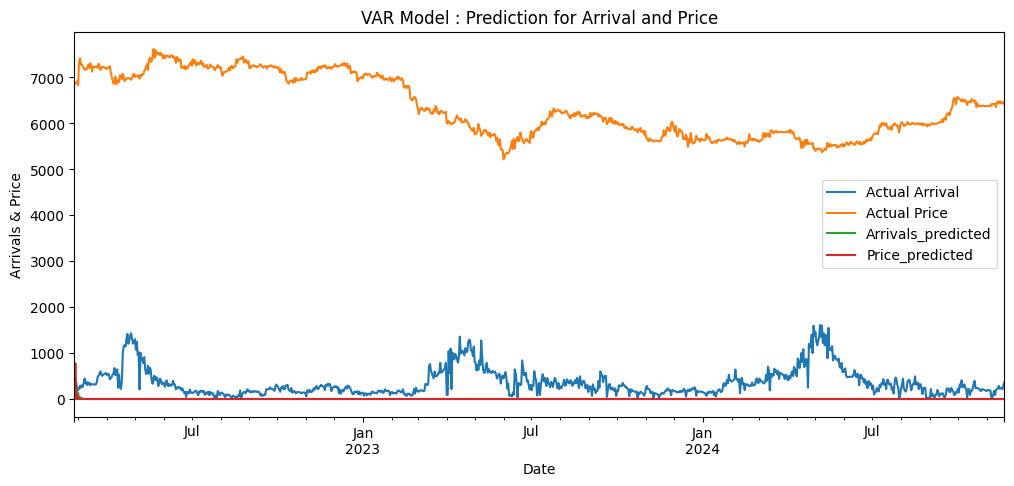

In [23]:
import matplotlib.pyplot as plt

test_vs_pred_combined.plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("Arrivals & Price")
plt.title("VAR Model : Prediction for Arrival and Price")
new_legend_labels = ['Actual Arrival', 'Actual Price'] + list(test_vs_pred_combined.columns[2:])  # Keeping the rest unchanged
plt.legend(labels=new_legend_labels)
plt.show()

In [24]:
import math
from sklearn.metrics import mean_squared_error
from statistics import mean

# Assuming 'test_df' has a 'Date' column or index:
# Align the predictions with the corresponding dates in test_df
predictions = forecast_df.set_index(test_df.index[:len(forecast_df)]) # If 'Date' is an index
# predictions = predictions.set_index(test_df['Date'][:len(predictions)]) # If 'Date' is a column

# Select the portion of test_df corresponding to the predicted period
test_df_subset = test_df.loc[predictions.index]  # Align test_df based on index

rmse_price = math.sqrt(mean_squared_error(predictions['Price_predicted'], test_df_subset['Price']))
mean_price = mean(test_df['Price'])
error_percentage_price = (rmse_price / mean_price) * 100

print(f'Mean value of Price is : {mean_price}. Root Mean Squared Error is :{rmse_price}')
print(f'Error percentage for Price prediction: {error_percentage_price:.2f}%')


rmse_arrivals = math.sqrt(mean_squared_error(predictions['Arrivals_predicted'], test_df_subset['Arrival']))
mean_arrivals = mean(test_df['Arrival'])
error_percentage_arrivals = (rmse_arrivals / mean_arrivals) * 100

print(f'Mean value of Arrivals is : {mean_arrivals}. Root Mean Squared Error is :{rmse_arrivals}')
print(f'Error percentage for Arrivals prediction: {error_percentage_arrivals:.2f}%')

Mean value of Price is : 6353.292616666667. Root Mean Squared Error is :6385.801678767469
Error percentage for Price prediction: 100.51%
Mean value of Arrivals is : 355.97677432222224. Root Mean Squared Error is :462.6866859470374
Error percentage for Arrivals prediction: 129.98%


In [25]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

# Calculate MSE, RMSE, and RMSE Percentage for "Arrivals"
mse_Arrivals = mean_squared_error(predictions['Arrivals_predicted'], test_df['Arrival'])
rmse_Arrivals = math.sqrt(mse_Arrivals)
rmse_Arrivals_percentage = (rmse_Arrivals / mean(test_df['Arrival'])) * 100

# Print results for "Arrivals"
print('Mean value of Arrivals is : {}. MSE is : {}. RMSE is : {}. RMSE Percentage: {:.2f}%'.format(
    mean(test_df['Arrival']), mse_Arrivals, rmse_Arrivals, rmse_Arrivals_percentage))

# Calculate MSE, RMSE, and RMSE Percentage for "Price"
mse_Price = mean_squared_error(predictions['Price_predicted'], test_df['Price'])
rmse_Price = math.sqrt(mse_Price)
rmse_Price_percentage = (rmse_Price / mean(test_df['Price'])) * 100

# Print results for "Price"
print('Mean value of Price is : {}. MSE is : {}. RMSE is : {}. RMSE Percentage: {:.2f}%'.format(
    mean(test_df['Price']), mse_Price, rmse_Price, rmse_Price_percentage))


Mean value of Arrivals is : 355.97677432222224. MSE is : 214078.96935265244. RMSE is : 462.6866859470374. RMSE Percentage: 129.98%
Mean value of Price is : 6353.292616666667. MSE is : 40778463.08054943. RMSE is : 6385.801678767469. RMSE Percentage: 100.51%
